# GROUP 11

### MEMBERS: 
### NOVIA DSILVA
### TANMAYI SHURPALI

#### CONNECTION TO  DATABASE

In [2]:
!pip install mysql.connector

In [18]:
pip install --upgrade mysql-connector-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 4.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

# Establish connection to MySQL
try:
    connection = mysql.connector.connect(
        host='localhost',          
        user='root',               
        password='Novia@2018',         
        database='DMA_PRO2'  
    )
    if connection.is_connected():
        print("Connected to the database successfully!")
except Error as e:
    print(f"Error connecting to MySQL: {e}")

Connected to the database successfully!


In [258]:
pip install mysql-connector-python pandas


Note: you may need to restart the kernel to use updated packages.


#### CREATION OF CURSOR

In [6]:
import mysql.connector
import pandas as pd

In [8]:
def create_connection():
    connection = mysql.connector.connect(
        host="localhost",  
        user="root",
        password="Novia@2018",
        database="DMA_PRO2"
    )
    return connection


In [10]:
def execute_query(query):
    connection = create_connection()
    try:
        cursor = connection.cursor()
        cursor.execute(query)
        result = cursor.fetchall()
        columns = [col[0] for col in cursor.description]
        return pd.DataFrame(result, columns=columns)
    except mysql.connector.Error as e:
        print(f"Error: {e}")
    finally:
        cursor.close()
        connection.close()


In [12]:
def fetch_data(query):
   
    try:
        if connection.is_connected():
            cursor = connection.cursor()
            cursor.execute(query)
            data = cursor.fetchall()
            columns = [desc[0] for desc in cursor.description]
            return pd.DataFrame(data, columns=columns)
    except Error as e:
        print(f"Error fetching data: {e}")


###  The List of Lender who has invested into startup Idea

In [45]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', message='pandas only supports SQLAlchemy connectable')


query = """
SELECT l.LENDER_ID, l.NAME AS 'LENDER NAME', l.INVESTMENT_AMT, s.idea AS 'IDEA'
FROM LENDER l, LOAN_APPLICATION la, STARTUP_IDEA s 
WHERE la.BORROWER_ID = s.BORROWER_ID 
AND l.LENDER_ID = la.LENDER_ID;
"""

df = pd.read_sql(query, connection)  

pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_columns', None)   
pd.set_option('display.width', 1000)         

# Display the DataFrame
display(df)


LENDER_ID     LENDER NAME  INVESTMENT_AMT                                                 IDEA
0          16  Steven Gregory        67280.62     Develop an AI-driven personal finance assistant.
1          17   Andrew Miller        45372.50  Create a platform for eco-friendly product rentals.
2          16  Steven Gregory        67280.62    Launch a sustainable packaging solutions startup.
3          19    Scott Thomas        18638.75       Build a mobile app for mental health tracking.
4          20   Larry Schmidt        53796.90      Establish a virtual reality education platform.
..        ...             ...             ...                                                  ...
73        171    Henry Brooks       207100.00       AI-based fraud detection for online businesses
74        172    Amelia Lewis       208200.00           Remote work efficiency management platform
75        173    James Morgan       209300.00                  AI-powered language translation app
76        174      Ava Powell       210400.00         Personalized travel recommendations platform
77        175     Noah Bailey       211500.00           Blockchain-powered energy trading platform

[78 rows x 4 columns]

### A simple query to list the Startup idea posted by the borrower

In [32]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [47]:
from IPython.display import display
import pandas as pd

query1 = """
SELECT b.borrower_id AS 'Borrower Id', b.name AS 'Borrower Name', s.idea AS 'Startup Idea' 
FROM borrower b, startup_idea s 
WHERE b.borrower_id = s.borrower_id;
"""
df1 = execute_query(query1)  

if not df1.empty:
    display(df1.style.hide(axis='index')) 
else:
    print("No data found for borrowers and startup ideas.")


query_total_ideas = """
SELECT COUNT(*) AS Total_Startup_Ideas
FROM startup_idea;
"""
total_ideas_df = execute_query(query_total_ideas) 

if not total_ideas_df.empty:
    total_ideas_count = total_ideas_df.iloc[0]['Total_Startup_Ideas']
    print(f"The total startup ideas: {total_ideas_count}")
else:
    print("No data available to display.")


The total startup ideas: 79


### The following a visualisation to display the startup idea of the Borrower

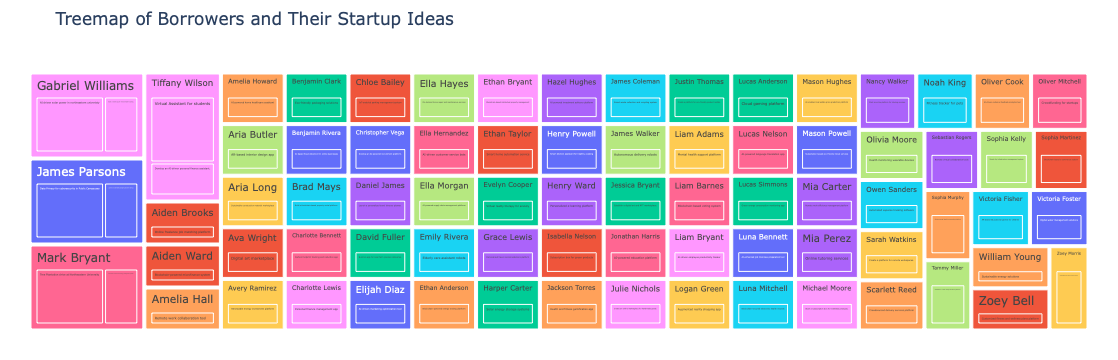

In [36]:
import plotly.express as px
df1['Idea Count'] = df1.groupby('Borrower Name').cumcount() + 1

# Treemap for borrowers and their startup ideas with rank-based proportional sizing
fig = px.treemap(
    df1,
    path=['Borrower Name', 'Startup Idea'],  
    values='Idea Count',  
    title='Treemap of Borrowers and Their Startup Ideas',
    color='Borrower Name',  
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


### The word cloud above highlights the most frequently used and repeated words in the startup ideas.

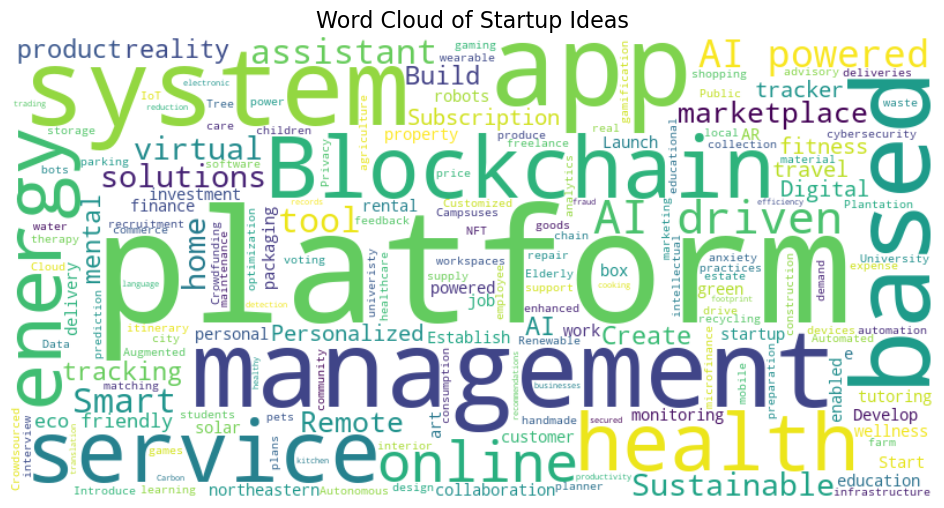

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all startup ideas into a single string
text = ' '.join(df1['Startup Idea'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud of Startup Ideas', fontsize=16)
plt.show()


### Inner joins used to display the modifications made to loan applications whenever any updates are made

In [395]:
import pandas as pd


query = """
SELECT 
    B.Name AS 'Borrower Name', 
    A.Timestamp, 
    A.Changes 
FROM 
    Borrower B
INNER JOIN 
    Loan_Application LA ON B.Borrower_ID = LA.Borrower_ID
INNER JOIN 
    Audit_Log A ON A.Audit_ID = LA.Audit_ID;
"""

# Fetch data from the database
cursor = connection.cursor()
cursor.execute(query)

# Extract rows and columns
rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]

# Create the DataFrame
df_changes = pd.DataFrame(rows, columns=columns)

# Display a preview
from IPython.display import display
display(df_changes)

# Close the cursor
cursor.close()


Borrower Name           Timestamp                                                Changes
0     Tiffany Wilson 2024-08-27 19:38:47                Loan application submitted by borrower.
1      Justin Thomas 2024-02-16 19:38:47                  Lender approved the loan application.
2      James Parsons 2024-03-06 19:38:47              Borrower updated loan collateral details.
3   Gabriel Williams 2024-05-03 19:38:47           Interest rate adjusted for loan application.
4       Tammy Miller 2024-06-04 19:38:47                    Repayment plan updated by borrower.
..               ...                 ...                                                    ...
94       Oliver Ward 2024-09-01 17:30:00          Notification sent for upcoming repayment due.
95       Ella Bailey 2024-08-31 09:15:00             Borrower added new funding source details.
96      Logan Brooks 2024-08-30 10:45:00  System flagged potential duplicate loan applications.
97  Charlotte Hughes 2024-08-29 12:30:00    Notification sent for loan disbursement completion.
98     Aiden Simmons 2024-08-28 14:00:00      Lender provided feedback on borrower performance.

[99 rows x 3 columns]

True

### This visualization highlights the monthly trend of changes made to the data.

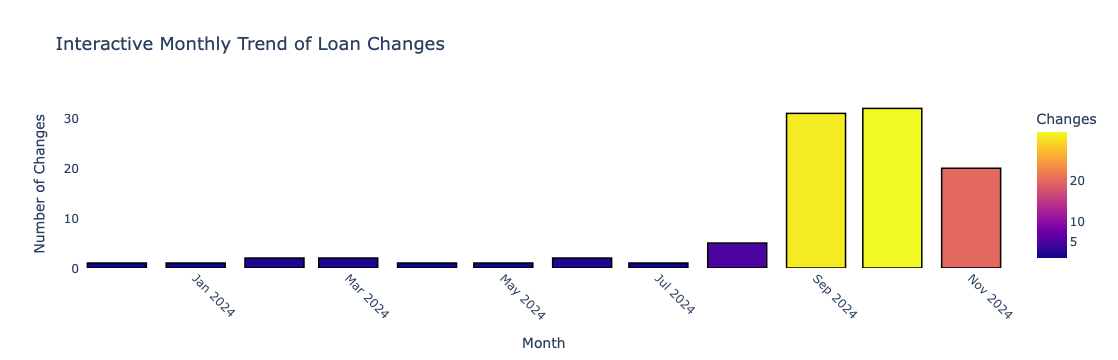

In [615]:
import plotly.express as px

# Convert Timestamp to datetime and extract the month
df_changes['Month'] = pd.to_datetime(df_changes['Timestamp']).dt.to_period('M').astype(str)

# Aggregate changes by month
monthly_changes = df_changes.groupby('Month').size().reset_index(name='Number of Changes')


fig = px.bar(
    monthly_changes,
    x='Month',
    y='Number of Changes',
    title='Interactive Monthly Trend of Loan Changes',
    labels={'Month': 'Month', 'Number of Changes': 'Number of Changes'},
    color='Number of Changes',
    color_continuous_scale=px.colors.sequential.Plasma  
)

fig.update_traces(
    hovertemplate='Month: %{x}<br>Number of Changes: %{y}<extra></extra>',
    marker=dict(line=dict(width=1.5, color='black')) 
)

fig.update_layout(
    title_font_size=18,
    xaxis_title='Month',
    yaxis_title='Number of Changes',
    xaxis_tickangle=45,  
    height=600,
    plot_bgcolor='white',  
    coloraxis_colorbar=dict(title='Changes', tickvals=[5, 10, 20])  # Adjust colorbar display
)

fig.show()


### Overview of Startup Ideas Funded by Lenders Across Various Categories

In [49]:
import pandas as pd

# Define your SQL query
query = """
SELECT 
    Lender.Lender_ID AS 'Lender ID', 
    Lender.Name AS 'Lender Name', 
    Startup_Idea.Idea AS 'Startup Idea'
FROM 
    Lender
JOIN 
    Loan_Application ON Lender.Lender_ID = Loan_Application.Lender_ID
JOIN 
    Startup_Idea ON Loan_Application.Borrower_ID = Startup_Idea.Borrower_ID;
"""

cursor = connection.cursor()
cursor.execute(query)

rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]

df_lender_ideas = pd.DataFrame(rows, columns=columns)

categories = {
    "Tech": ["AI", "blockchain", "data", "platform", "software", "cloud", "automation"],
    "Health": ["health", "med", "hospital", "care", "biotech", "pharma"],
    "Finance": ["finance", "money", "investment", "banking", "crypto", "wallet"],
    "Education": ["edu", "students", "learning", "teaching", "school", "edtech"],
    "Environment": ["sustainability", "green", "solar", "climate", "energy", "environment"],
    "Other": []  
}

def assign_category(idea):
    idea_lower = idea.lower()
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in idea_lower:
                return category
    return "Other"

df_lender_ideas['Category'] = df_lender_ideas['Startup Idea'].apply(assign_category)

# Group by category and display each group
grouped_df = df_lender_ideas.groupby('Category')

# Display each group
for name, group in grouped_df:
    print(f"\nCategory: {name}")
    display(group[['Lender ID', 'Lender Name', 'Startup Idea']].style.hide(axis='index')) 

cursor.close()



Category: Education



Category: Environment



Category: Finance



Category: Health



Category: Other



Category: Tech


True

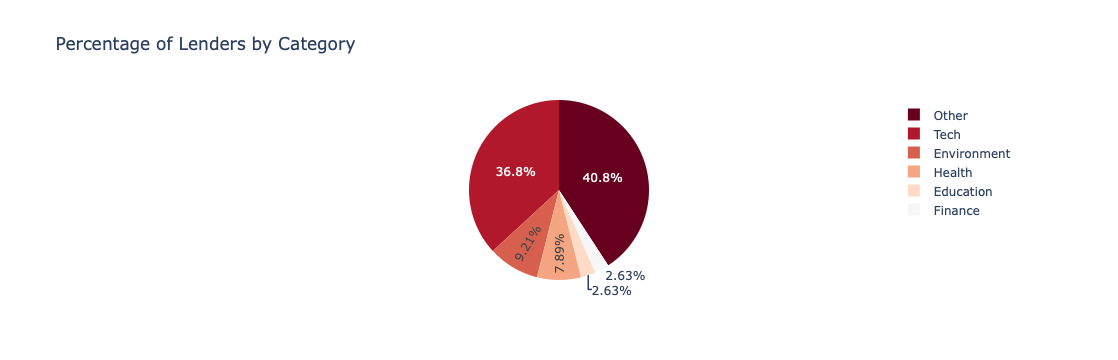

In [555]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

lender_category_counts = df_lender_ideas.groupby('Category')['Lender ID'].nunique()
fig_pie = px.pie(
    lender_category_counts.reset_index(),
    values='Lender ID',
    names='Category',
    title='Percentage of Lenders by Category',
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig_pie.show()


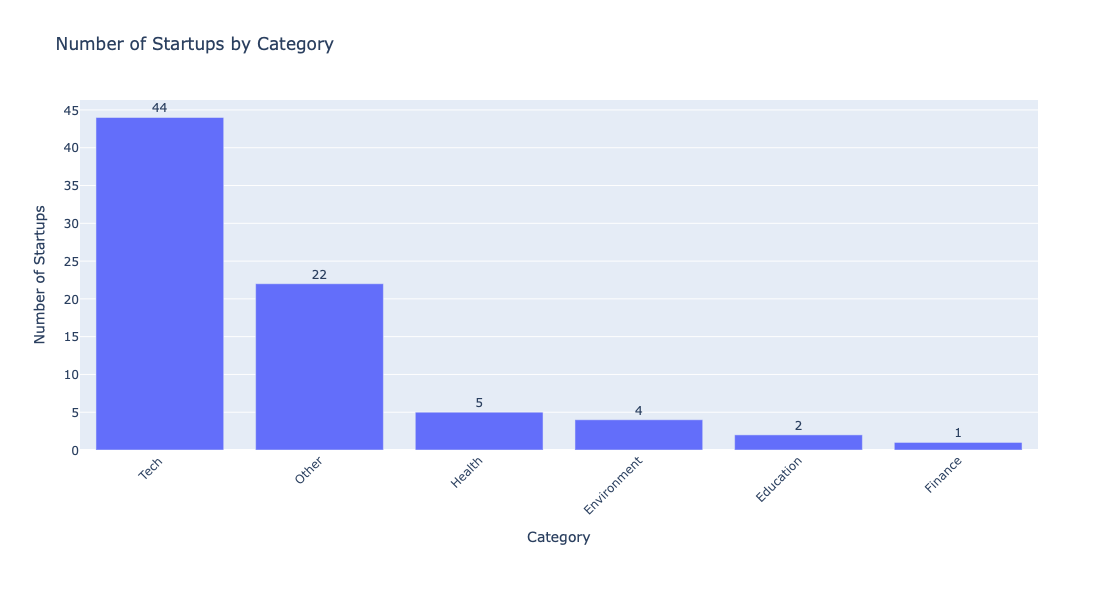

In [242]:
import pandas as pd
import plotly.express as px
import mysql.connector 

query = """
SELECT 
    Lender.Lender_ID AS 'Lender ID', 
    Lender.Name AS 'Lender Name', 
    Startup_Idea.Idea AS 'Startup Idea'
FROM 
    Lender
JOIN 
    Loan_Application ON Lender.Lender_ID = Loan_Application.Lender_ID
JOIN 
    Startup_Idea ON Loan_Application.Borrower_ID = Startup_Idea.Borrower_ID;
"""

cursor = connection.cursor()
cursor.execute(query)
rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]
df_lender_ideas = pd.DataFrame(rows, columns=columns)
cursor.close()

Define categories and keywords
categories = {
    "Tech": ["AI", "blockchain", "data", "platform", "software", "cloud", "automation"],
    "Health": ["health", "med", "hospital", "care", "biotech", "pharma"],
    "Finance": ["finance", "money", "investment", "banking", "crypto", "wallet"],
    "Education": ["edu", "students", "learning", "teaching", "school", "edtech"],
    "Environment": ["sustainability", "green", "solar", "climate", "energy", "environment"],
    "Other": []  
}

def assign_category(idea):
    idea_lower = idea.lower()
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in idea_lower:
                return category
    return "Other"

df_lender_ideas["Category"] = df_lender_ideas["Startup Idea"].apply(assign_category)

#Aggregate data
category_counts = df_lender_ideas.groupby("Category").size().reset_index(name="Count")

#Sort categories by count for better visualization
category_counts = category_counts.sort_values("Count", ascending=False)

fig_bar = px.bar(
    category_counts,
    x="Category",
    y="Count",
    title="Number of Startups by Category",
    labels={"Count": "Number of Startups"},
    text="Count",
)

fig_bar.update_traces(textposition="outside")
fig_bar.update_layout(
    xaxis_title="Category",
    yaxis_title="Number of Startups",
    xaxis_tickangle=-45,  
    margin=dict(b=150),   
    height=600,           
    width=800,            
)

# Display the interactive bar chart
fig_bar.show()

### Loan approved by the lenders

In [51]:
import pandas as pd
import warnings


# Suppress specific warnings
warnings.filterwarnings("ignore", message="pandas only supports SQLAlchemy connectable")


def fetch_and_display_ideas():
    query = """
    SELECT 
        L.Lender_ID AS 'Lender ID', 
        L.Name AS 'Lender Name', 
        GROUP_CONCAT(DISTINCT IFNULL(SI.Idea, 'No Specific Idea') ORDER BY SI.Idea SEPARATOR '; ') AS 'Funded Startup Ideas',
        SUM(CASE WHEN LS.Status = 'Approved' THEN 1 ELSE 0 END) AS 'Total Approved Loans'
    FROM 
        Lender L
    LEFT JOIN 
        Loan_Application LA ON L.Lender_ID = LA.Lender_ID
    LEFT JOIN 
        Startup_Idea SI ON LA.Borrower_ID = SI.Borrower_ID
    LEFT JOIN 
        Loan_Status LS ON LA.Loan_ID = LS.Loan_ID
    GROUP BY L.Lender_ID, L.Name
    ORDER BY L.Lender_ID;
    """

    df = pd.read_sql(query, con=connection)

    pd.set_option('display.max_columns', None)
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_colwidth', None)

    styled_df = df.style.hide(axis='index') \
                        .format({'Total Approved Loans': '{:.0f}'}) \
                        .set_properties(subset=['Funded Startup Ideas'], **{'text-align': 'left', 'white-space': 'pre-wrap'}) \
                        .set_properties(**{'text-align': 'center'}) \
                        .set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
                                           {'selector': 'td', 'props': [('font-size', '11pt')]},
                                           {'selector': '.data', 'props': [('text-align', 'left')]}]) \
                        .bar(subset=["Total Approved Loans"], color='#5fba7d')

    print("Lenders and Their Funded Startup Ideas with Total Approved Loans:")
    display(styled_df)


fetch_and_display_ideas()




Lenders and Their Funded Startup Ideas with Total Approved Loans:


### Display of Fund status of borrowers loan applications & visualisation done for analysis of the same 

  Fund Status  Count
0      Funded      8
1   Completed      8
2     Pending      7
3     Partial      6
4   Cancelled      6


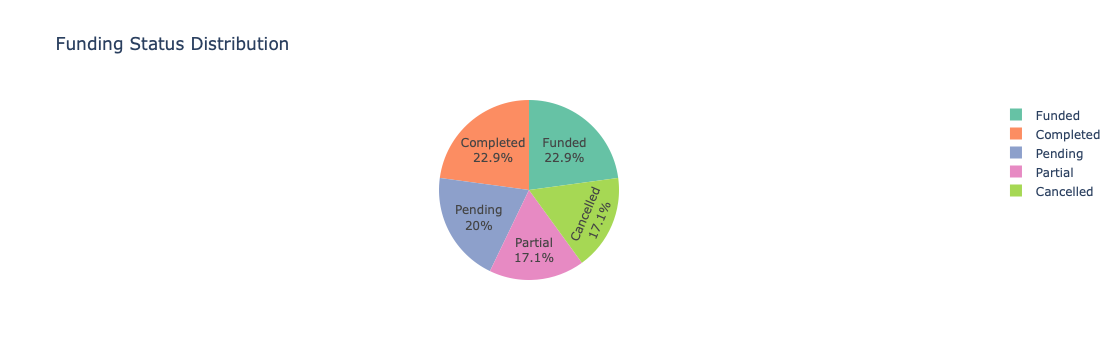

In [262]:
import pandas as pd
import plotly.express as px


query = """
SELECT 
    Loan_Application.Loan_ID AS 'Loan ID',
    Borrower.Name AS 'Borrower Name',
    Lender.Name AS 'Lender Name',
    Funds.Fund_Status AS 'Fund Status',
    Funds.Fund_Date AS 'Fund Date'
FROM 
    Loan_Application
LEFT JOIN 
    Borrower ON Loan_Application.Borrower_ID = Borrower.Borrower_ID
LEFT JOIN 
    Funds ON Loan_Application.Loan_ID = Funds.Loan_ID
LEFT JOIN 
    Lender ON Funds.Lender_ID = Lender.Lender_ID
ORDER BY 
    Loan_Application.Loan_ID, Funds.Fund_Date;
"""

cursor = connection.cursor()
cursor.execute(query)

rows = cursor.fetchall()
columns = [desc[0] for desc in cursor.description]

df_funds_details = pd.DataFrame(rows, columns=columns)

# Convert 'Fund Date' to datetime
df_funds_details['Fund Date'] = pd.to_datetime(df_funds_details['Fund Date'])

cursor.close()

# Step 1: Count the number of funds per status
status_counts = df_funds_details['Fund Status'].value_counts().reset_index()
status_counts.columns = ['Fund Status', 'Count']

print(status_counts)

# Step 2: Create a pie chart
fig = px.pie(
    status_counts,
    names='Fund Status',
    values='Count',
    title='Funding Status Distribution',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

### This script identifies top borrowers and analyzes loan request distribution.

In [43]:
import pandas as pd

query = """
SELECT 
    Borrower.Borrower_ID AS 'Borrower ID',
    Borrower.Name AS 'Borrower Name',
    COUNT(Loan_Application.Loan_ID) AS 'Number of Loans Requested'
FROM 
    Borrower
LEFT JOIN 
    Loan_Application ON Borrower.Borrower_ID = Loan_Application.Borrower_ID
GROUP BY 
    Borrower.Borrower_ID, Borrower.Name;
"""
cursor = connection.cursor()
cursor.execute(query)
data = cursor.fetchall()

columns = [desc[0] for desc in cursor.description]

df = pd.DataFrame(data, columns=columns)


top_borrowers = df.sort_values(by='Number of Loans Requested', ascending=False).head(10)
print("Top Borrowers by Number of Loans:")
print(top_borrowers)

stats = df['Number of Loans Requested'].describe()
print("Descriptive Statistics for Loan Requests:")
print(stats)


Top Borrowers by Number of Loans:
    Borrower ID     Borrower Name  Number of Loans Requested
25           41     William Young                          2
9            10  Christopher Vega                          2
51           67       Aria Butler                          2
79           95      Logan Brooks                          2
31           47   Isabella Nelson                          2
20           36         Mia Perez                          2
66           82       Liam Bryant                          2
15           31   Jonathan Harris                          2
60           76     Sophia Murphy                          2
75           91   Sophia Martinez                          2
Descriptive Statistics for Loan Requests:
count    100.000000
mean       0.990000
std        0.481894
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: Number of Loans Requested, dtype: float64


### This script analyzes loans to determine the proportion with zero investors, leveraging a subquery to calculate the number of investors for each loan. The results are visualized using a pie chart to highlight the proportions

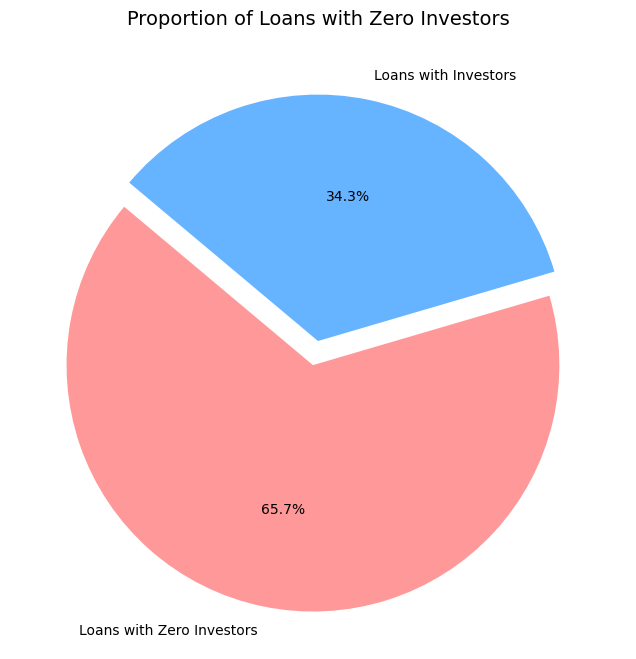

In [101]:
import matplotlib.pyplot as plt
import pandas as pd

query = """
SELECT 
    Loan_Application.Loan_ID AS 'Loan ID', 
    (SELECT COUNT(Funds.Lender_ID) 
     FROM Funds 
     WHERE Funds.Loan_ID = Loan_Application.Loan_ID) AS 'Number of Investors'
FROM 
    Loan_Application;
"""

cursor = connection.cursor()
cursor.execute(query)
data = cursor.fetchall()

columns = [desc[0] for desc in cursor.description]

df = pd.DataFrame(data, columns=columns)

df_zero_investors = df[df['Number of Investors'] == 0]

total_loans = len(df)
zero_investors = len(df_zero_investors)
non_zero_investors = total_loans - zero_investors

labels = ['Loans with Zero Investors', 'Loans with Investors']
sizes = [zero_investors, non_zero_investors]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Proportion of Loans with Zero Investors', fontsize=14)
plt.show()



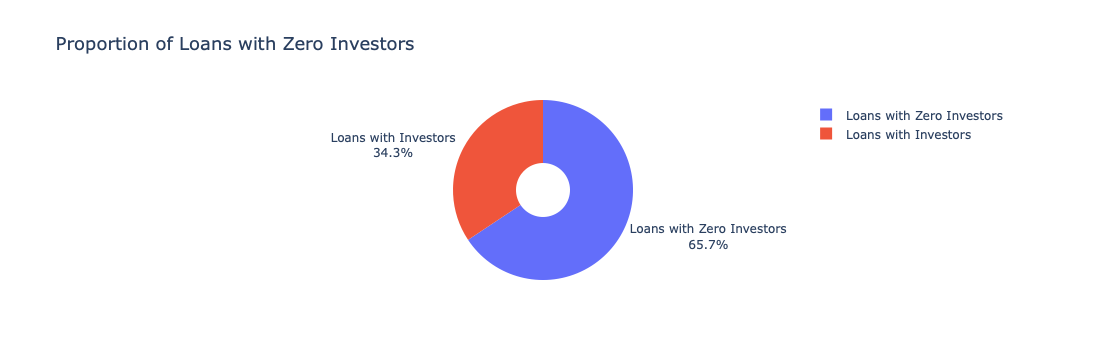

In [312]:
import plotly.graph_objects as go
import pandas as pd

# SQL Query to get loans and their investor count
query = """
SELECT 
    Loan_Application.Loan_ID AS 'Loan ID', 
    (SELECT COUNT(Funds.Lender_ID) 
     FROM Funds 
     WHERE Funds.Loan_ID = Loan_Application.Loan_ID) AS 'Number of Investors'
FROM 
    Loan_Application;
"""

# Execute the query
cursor.execute(query)
data = cursor.fetchall()

# Get column names
columns = [desc[0] for desc in cursor.description]

df = pd.DataFrame(data, columns=columns)

df_zero_investors = df[df['Number of Investors'] == 0]

total_loans = len(df)
zero_investors = len(df_zero_investors)
non_zero_investors = total_loans - zero_investors

labels = ['Loans with Zero Investors', 'Loans with Investors']
values = [zero_investors, non_zero_investors]

fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values,
    hoverinfo='label+percent+value',
    textinfo='label+percent',
    hole=.3
)])

fig.update_layout(
    title_text="Proportion of Loans with Zero Investors",
    title_font_size=18
    
)

fig.show()

### This script identifies the top 10 borrowers by transaction volume using a nested query to aggregate transaction counts for each borrower. The results are visualized interactively with a bar chart, allowing for detailed insights into borrower activity.

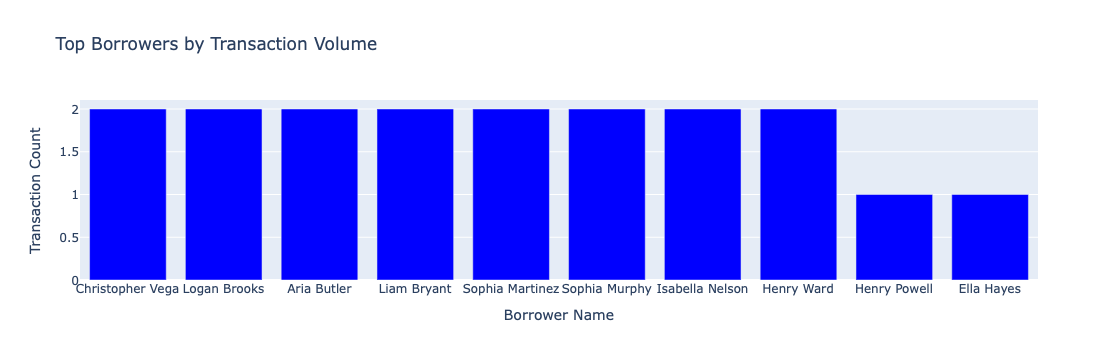

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


query = """
SELECT 
    Borrower.Name AS Borrower_Name, 
    Transactions.Total_Transactions
FROM 
    Borrower
JOIN 
    (SELECT 
         Loan_Application.Borrower_ID, 
         COUNT(Transaction_Record.Transaction_ID) AS Total_Transactions
     FROM 
         Transaction_Record
     JOIN 
         Loan_Application ON Transaction_Record.Loan_ID = Loan_Application.Loan_ID
     GROUP BY 
         Loan_Application.Borrower_ID) AS Transactions
ON 
    Borrower.Borrower_ID = Transactions.Borrower_ID;
"""

# Execute the query using your database connection
cursor.execute(query)
results = cursor.fetchall()

# Convert results to a DataFrame for analysis
data = pd.DataFrame(results, columns=["Borrower_Name", "Total_Transactions"])

# Top Borrowers by Transaction Volume
top_borrowers = data.sort_values(by="Total_Transactions", ascending=False).head(10)

fig = px.bar(
    top_borrowers,
    x="Borrower_Name",
    y="Total_Transactions",
    title="Top Borrowers by Transaction Volume",
    labels={"Borrower_Name": "Borrower Name", "Total_Transactions": "Transaction Count"},
    hover_data=["Total_Transactions"]
)

fig.update_traces(marker_color='blue', hovertemplate='<b>%{x}</b>: %{y} transactions')

fig.show()


### Analysis of monthly transaction trends using CORRELATED query and visualizes the results with an interactive line chart.

Monthly Total Transactions:
      Month  Total_Transactions
0   2023-09                   1
1   2023-10                   1
2   2023-11                   2
3   2023-12                   2
4   2024-01                   2
5   2024-02                   2
6   2024-03                   3
7   2024-04                   3
8   2024-05                   3
9   2024-06                   3
10  2024-07                   3
11  2024-08                   4
12  2024-09                   2
13  2024-10                   3
14  2024-11                   2


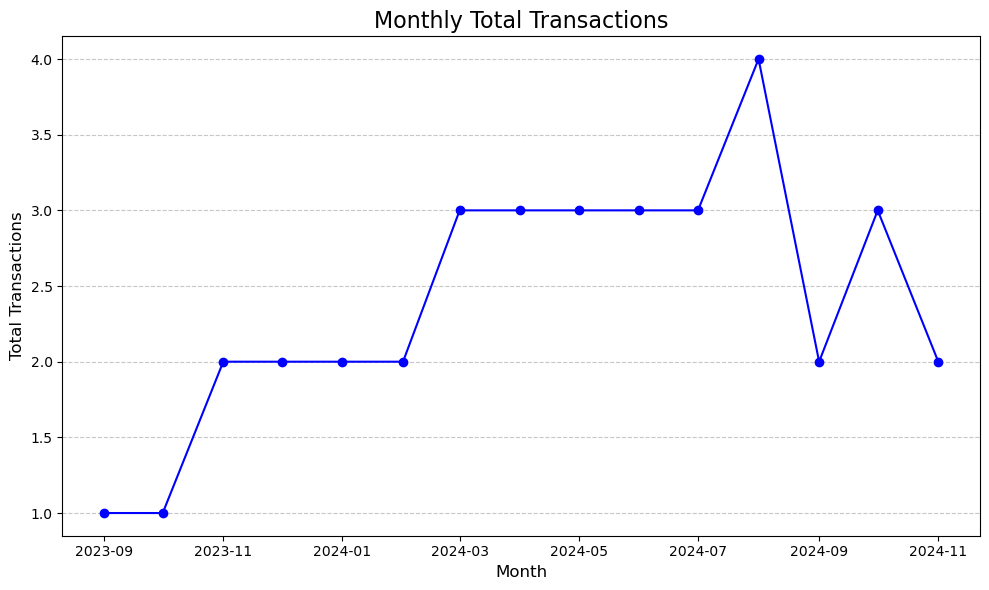

In [53]:
import pandas as pd

# Define the SQL query with a correlated subquery
query = """
SELECT DISTINCT
    DATE_FORMAT(Payment_DT, '%Y-%m') AS Month,
    (SELECT COUNT(Transaction_ID)
     FROM Transaction_Record T2
     WHERE DATE_FORMAT(T2.Payment_DT, '%Y-%m') = DATE_FORMAT(T1.Payment_DT, '%Y-%m')
       AND T2.Payment_DT <= CURDATE()) AS Total_Transactions
FROM 
    Transaction_Record T1
WHERE 
    Payment_DT <= CURDATE()
ORDER BY 
    Month;
"""

cursor = connection.cursor()
cursor.execute(query)

columns = [desc[0] for desc in cursor.description]
results = cursor.fetchall()

df = pd.DataFrame(results, columns=columns)

print("Monthly Total Transactions:")
print(df)

import matplotlib.pyplot as plt

df['Month'] = pd.to_datetime(df['Month'])
df = df.sort_values(by='Month')  

plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Total_Transactions'], marker='o', color='blue', linestyle='-')

plt.title("Monthly Total Transactions", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Transactions", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### This script performs a financial analysis of the top 5 lenders by total loaned amount, visualizing their loan contributions alongside the number of disputes through a combined bar and line chart.

   Lender_ID Total_Loaned_Amount  Total_Disputes
0         16           162369.74               3
1         22           135095.17               3
2         25            95102.36               1
3        187            95000.90               0
4        170            95000.85               0


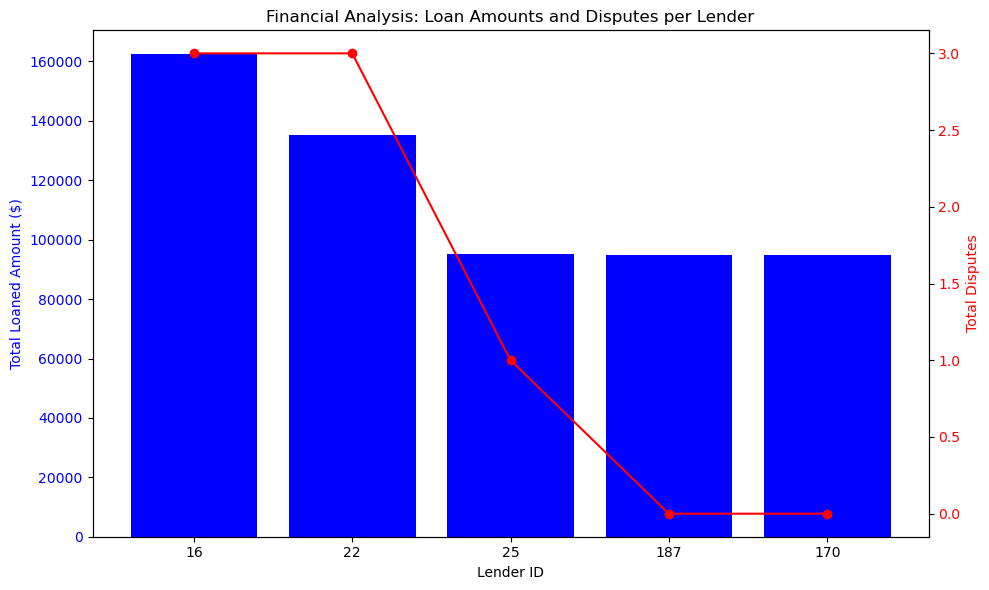

In [81]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


query = """
SELECT l.Lender_ID, SUM(la.Amount) AS Total_Loaned_Amount, COUNT(d.Dispute_ID) AS Total_Disputes
FROM Lender l
JOIN Loan_Application la ON l.Lender_ID = la.Lender_ID
LEFT JOIN Dispute d ON la.Loan_ID = d.Loan_ID
GROUP BY l.Lender_ID
ORDER BY Total_Loaned_Amount DESC
LIMIT 5;
"""


cursor = connection.cursor()
cursor.execute(query)
columns = [desc[0] for desc in cursor.description]
data = cursor.fetchall()
df = pd.DataFrame(data, columns=columns)


print(df)

if not df.empty:
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.bar(df['Lender_ID'].astype(str), df['Total_Loaned_Amount'], color='blue', label='Total Loaned Amount')
    ax1.set_xlabel('Lender ID')
    ax1.set_ylabel('Total Loaned Amount ($)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(df['Lender_ID'].astype(str), df['Total_Disputes'], color='red', marker='o', linestyle='-', label='Total Disputes')
    ax2.set_ylabel('Total Disputes', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    plt.title('Financial Analysis: Loan Amounts and Disputes per Lender')
    fig.tight_layout()


    plt.show()
else:
    print("No data available to display. Please check your query and database connection.")


### This script retrieves lenders whose investment amounts are greater than or equal to at least one loan application amount, presenting the results in a chart format for analysis.

Lender Name Investment Amount
0        Steven Gregory          67280.62
1         Andrew Miller          45372.50
2   Christine Patterson          80547.86
3          Scott Thomas          18638.75
4         Larry Schmidt          53796.90
..                  ...               ...
95         Lucas Hughes         234600.00
96         Henry Rivera         235700.00
97          Grace Scott         236800.00
98        Oliver Morgan         237900.00
99   Charlotte Mitchell         239000.00

[100 rows x 2 columns]

Index(['Lender_Name', 'Investment_Amount'], dtype='object')

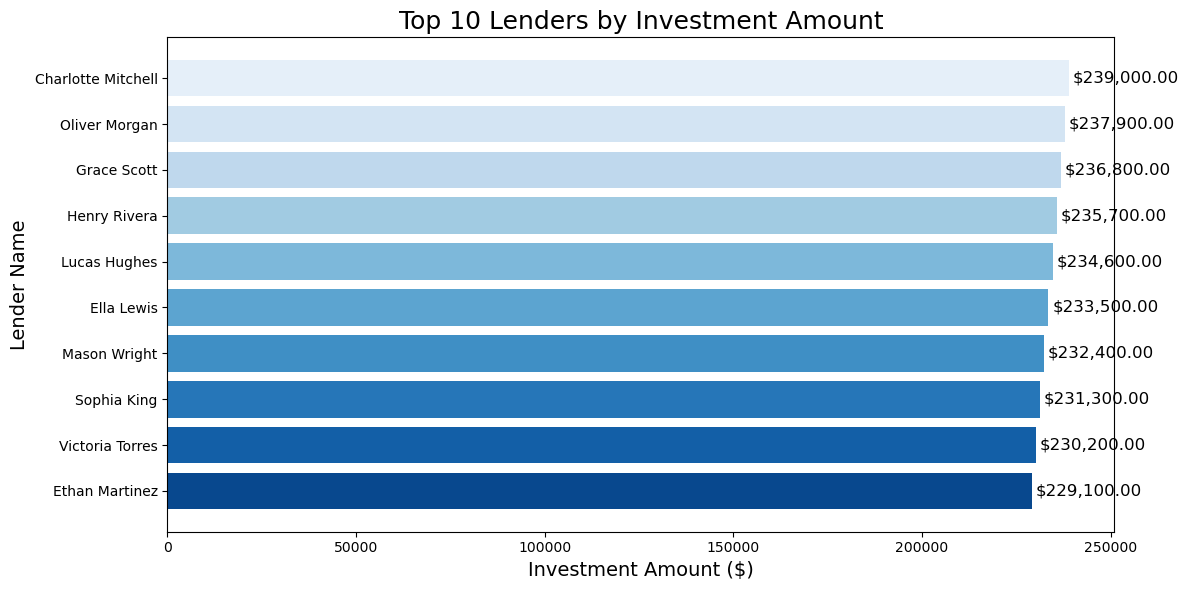

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

query = """
SELECT 
    L.Name AS 'Lender Name', 
    L.Investment_Amt AS 'Investment Amount'
FROM 
    Lender L
WHERE 
    L.Investment_Amt >= ANY (SELECT LA.Amount 
                             FROM Loan_Application LA);
"""

cursor = connection.cursor()
cursor.execute(query)


columns = [desc[0] for desc in cursor.description]
results = cursor.fetchall()

df = pd.DataFrame(results, columns=columns)
display(df)

df.columns = df.columns.str.strip().str.replace(" ", "_")
display(df.columns)  


df_sorted = df.sort_values(by="Investment_Amount", ascending=False)

N = 10
df_top = df_sorted.head(N)

plt.figure(figsize=(12, 6))
colors = sns.color_palette("Blues", len(df_top)) 
bars = plt.barh(df_top["Lender_Name"], df_top["Investment_Amount"], color=colors)

plt.gca().invert_yaxis()

plt.title(f"Top {N} Lenders by Investment Amount", fontsize=18)
plt.xlabel("Investment Amount ($)", fontsize=14)
plt.ylabel("Lender Name", fontsize=14)

for bar, amount in zip(bars, df_top["Investment_Amount"]):
    plt.text(bar.get_width() + 1000, bar.get_y() + bar.get_height() / 2, 
             f"${amount:,.2f}", va='center', fontsize=12)

plt.tight_layout()
plt.show()
